In [1]:
import numpy as np
import pandas as pd

In [2]:
from functools import reduce

In [4]:
df = pd.read_json('spacex.json', lines=True)
df

,time,velocity,altitude
0,0.033,0.277,0.0
1,0.066,0.277,0.0
2,0.100,0.277,0.0
3,0.133,0.555,0.0
4,0.166,0.833,0.0
...,...,...,...
14360,533.200,0.000,0.0
14361,533.233,0.000,0.0
14362,533.266,0.000,0.0
14363,533.300,0.000,0.0


In [5]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 9]

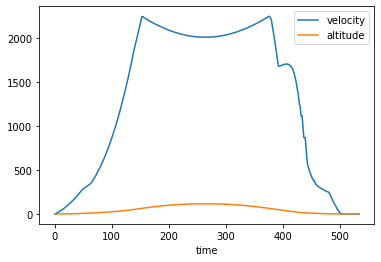

In [7]:
ax = df.plot(x='time', y='velocity')
df.plot(x='time', y="altitude", ax=ax)
plt.show()

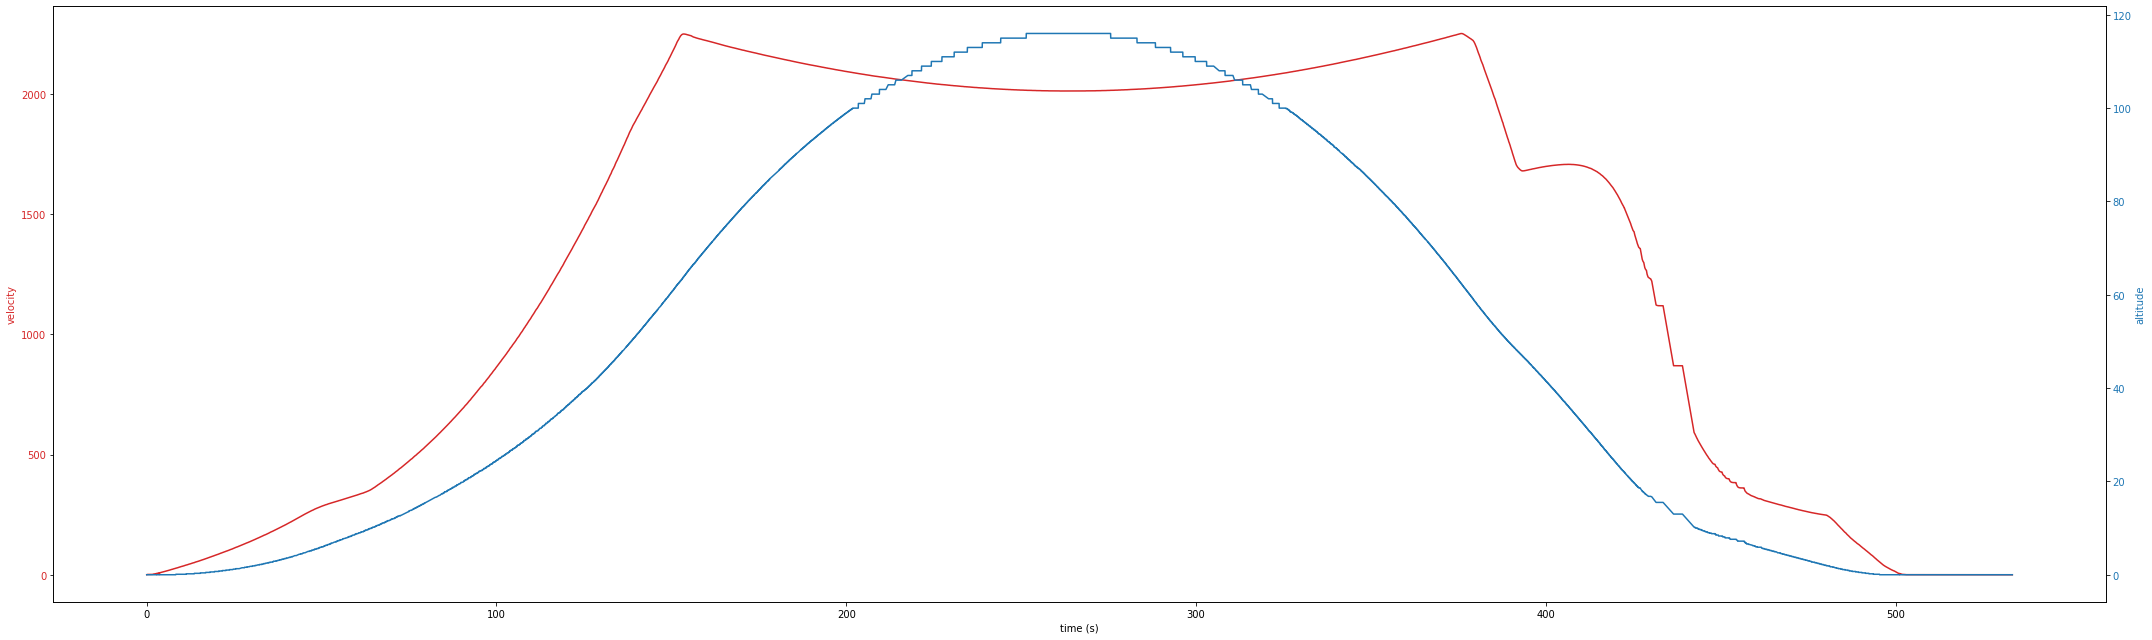

In [10]:
plt.rcParams['figure.figsize'] = [30, 9]
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('velocity', color=color)
ax1.plot(df['time'], df['velocity'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('altitude', color=color)  # we already handled the x-label with ax1
ax2.plot(df['time'], df['altitude'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()